In [1]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # Add the target column

# Display the first few rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


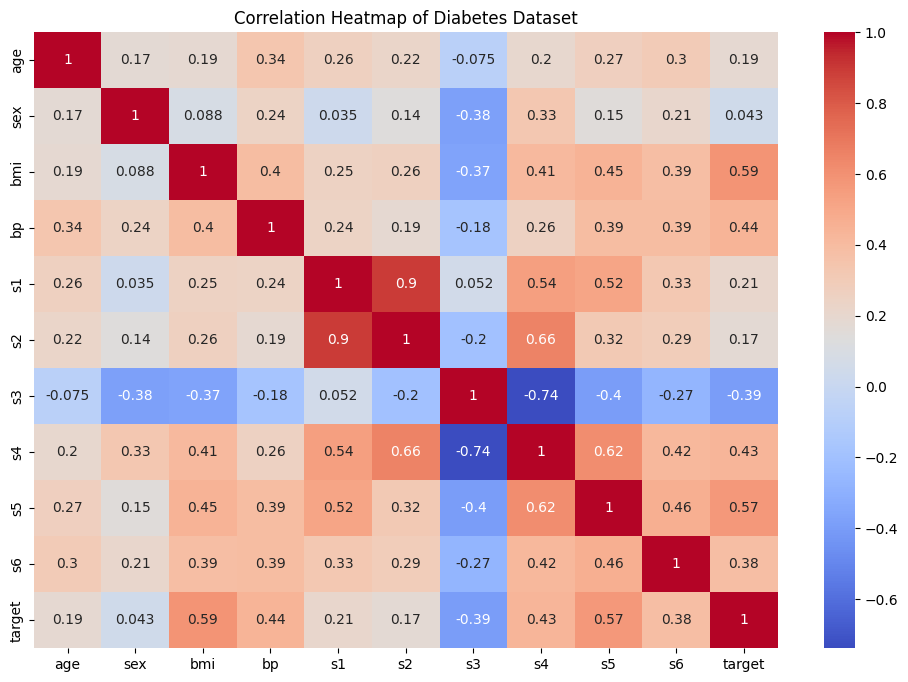

In [3]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()


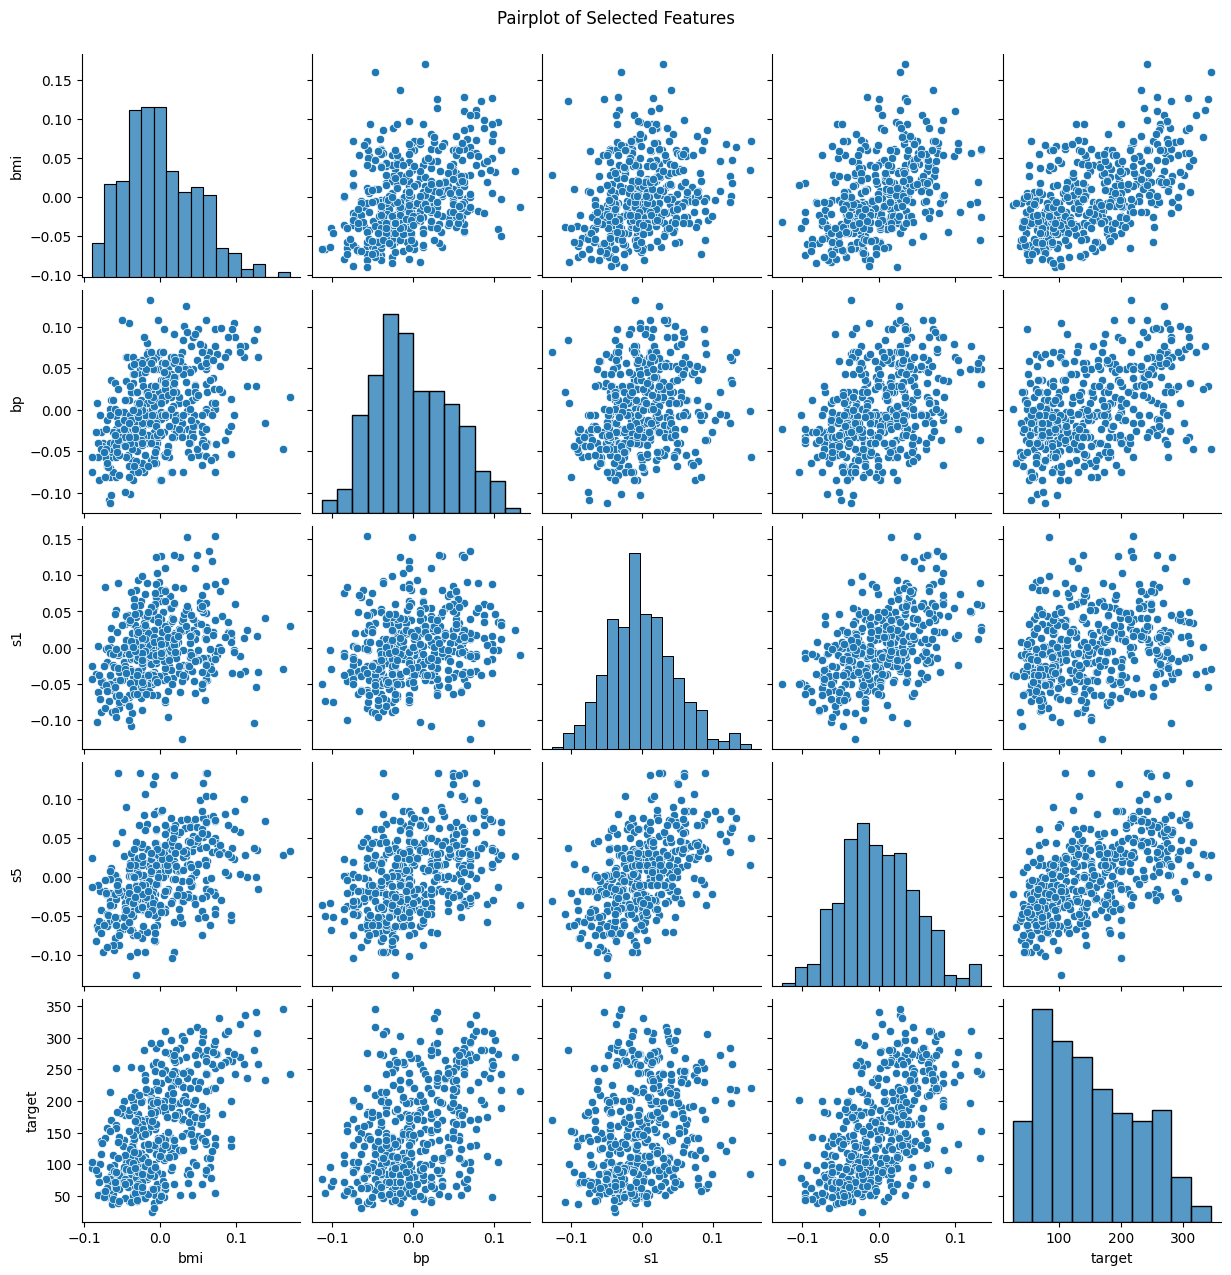

In [4]:
sns.pairplot(df[['bmi', 'bp', 's1', 's5', 'target']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


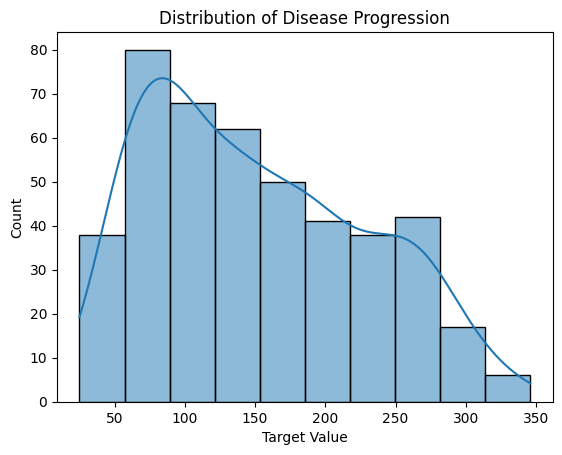

In [5]:
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Disease Progression')
plt.xlabel('Target Value')
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
# Load diabetes dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 2900.19
R^2 Score: 0.45


In [12]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# Load diabetes dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data (Training 80% / Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Evaluate the model
y_pred = ridge_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 3077.42
R^2 Score: 0.42


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Set up the model
ridge_model = Ridge()

# Define the parameter grid (you can try different alpha values)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Train Ridge Regression with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Predict with the best model
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Best Alpha: 0.1
Mean Squared Error: 2856.49
R^2 Score: 0.46


Null Values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Data Types:
 age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Summary Statistics:
                 age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124

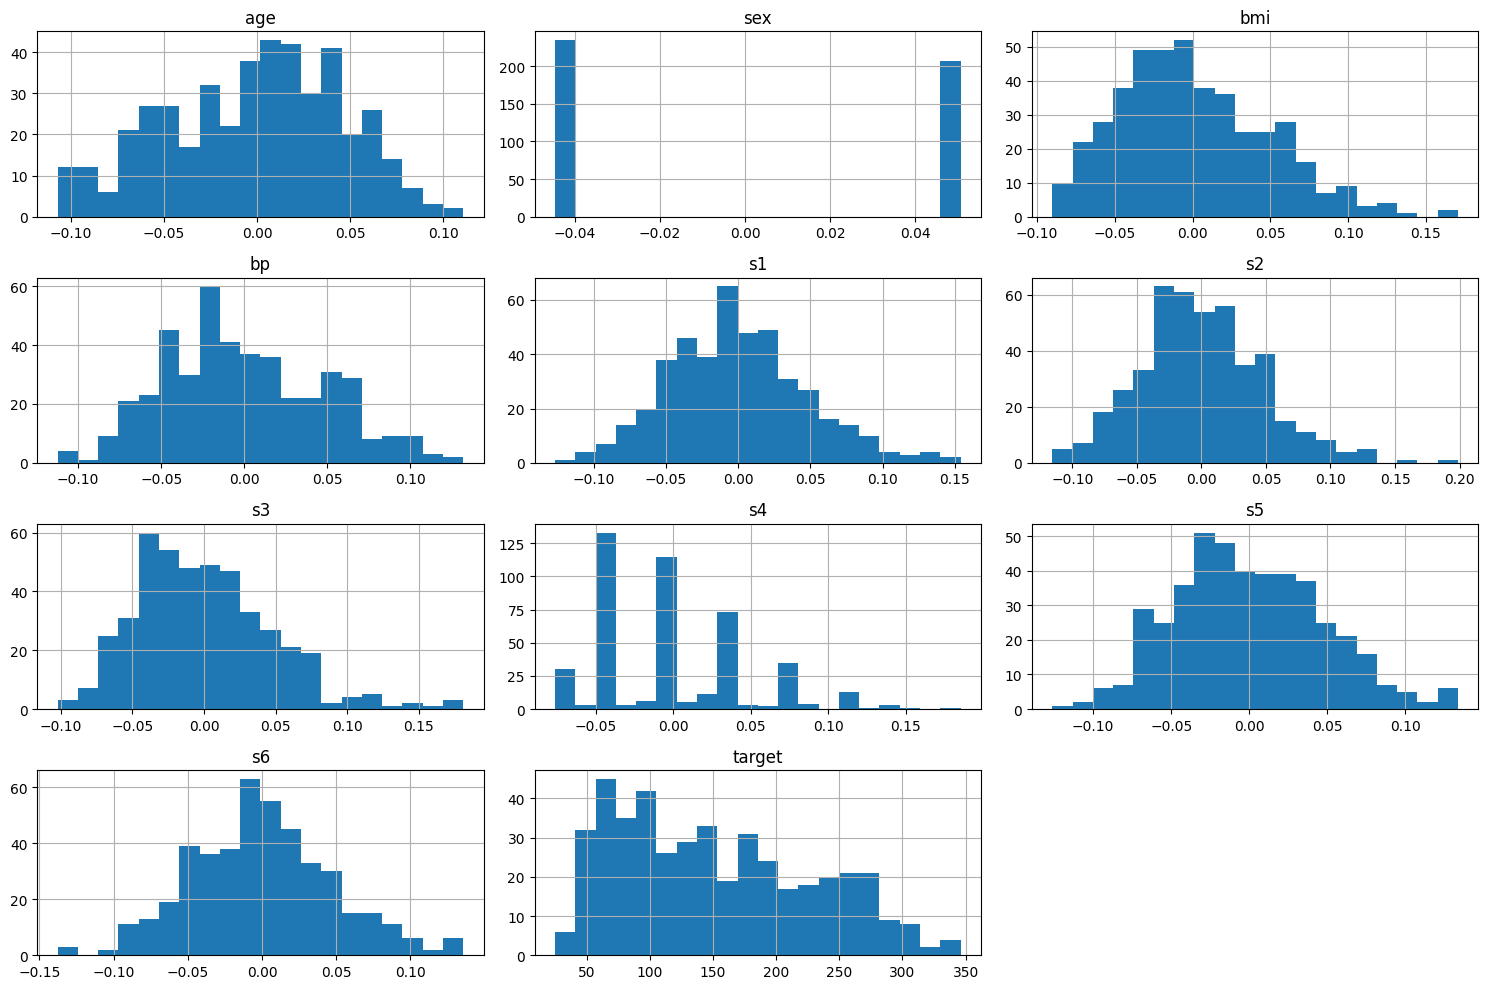

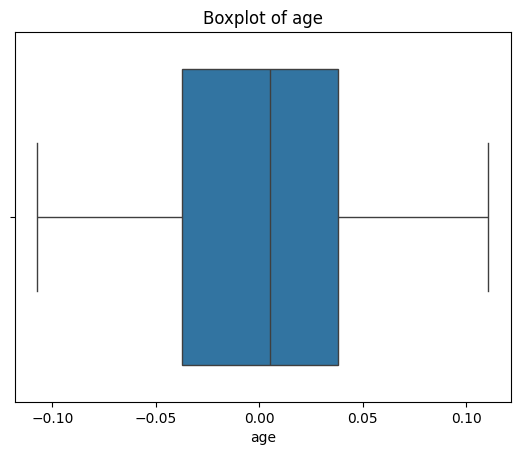

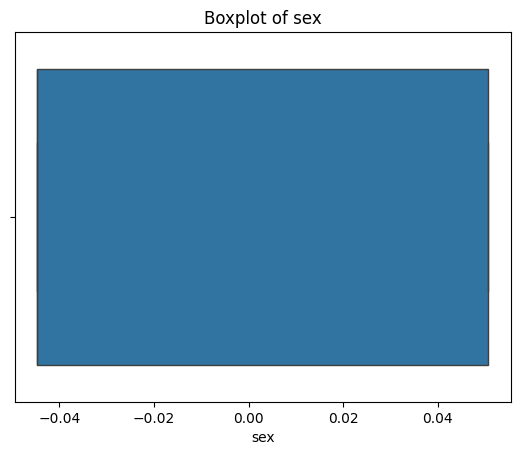

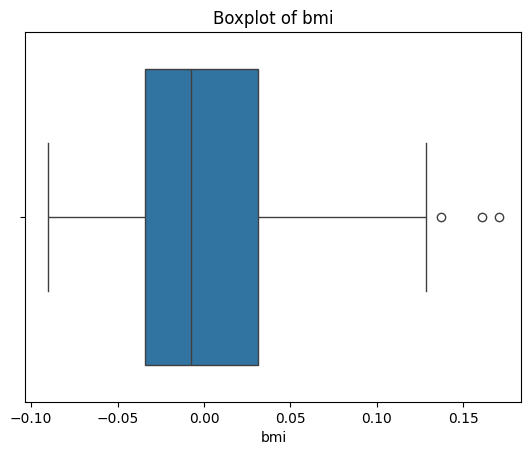

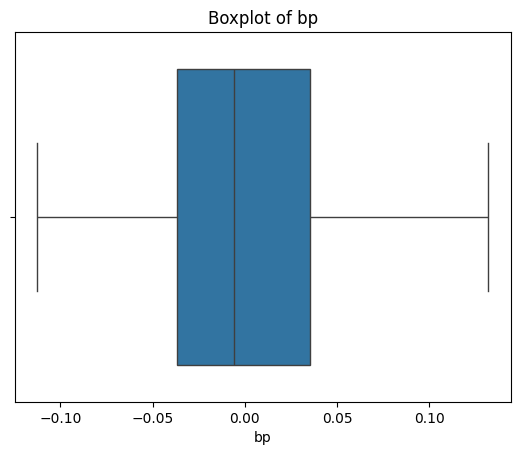

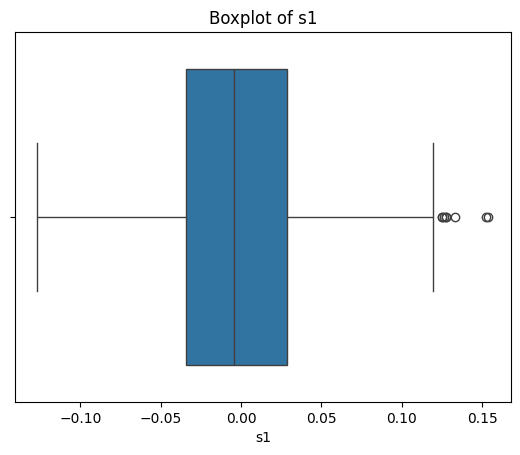

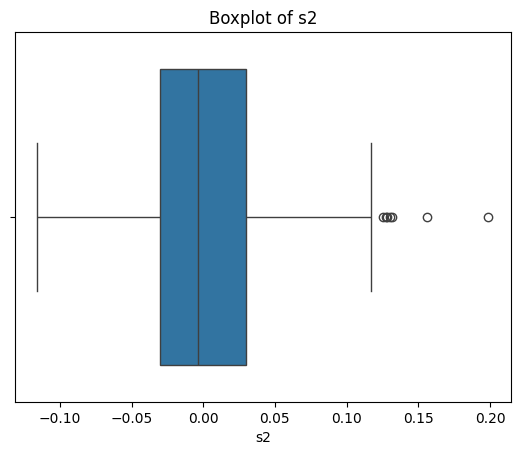

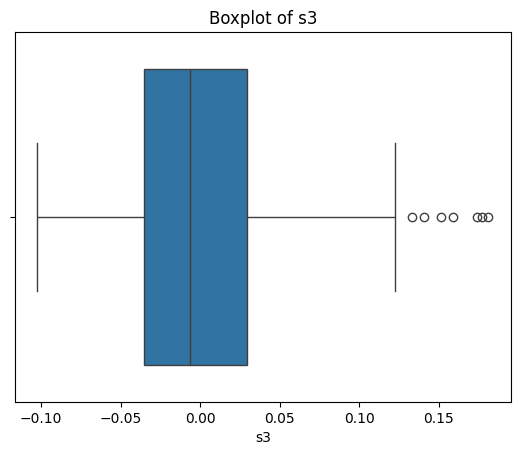

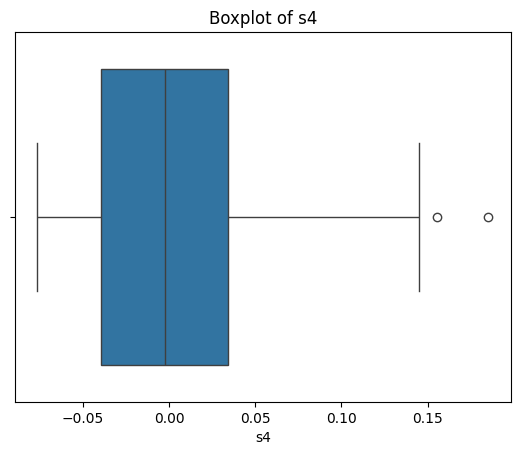

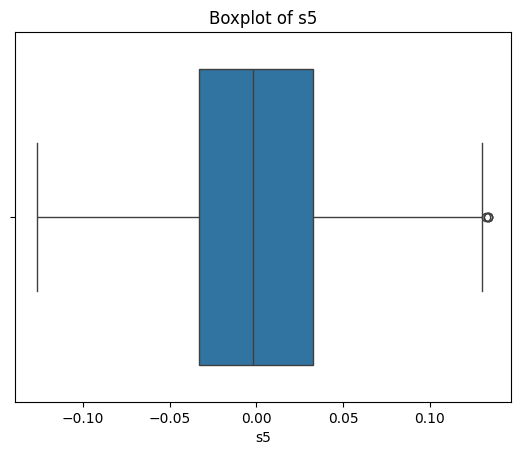

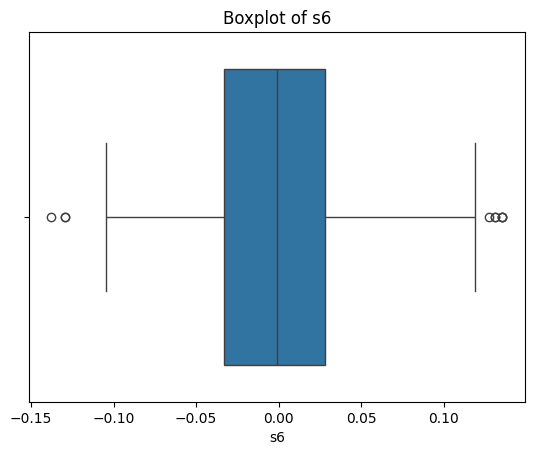

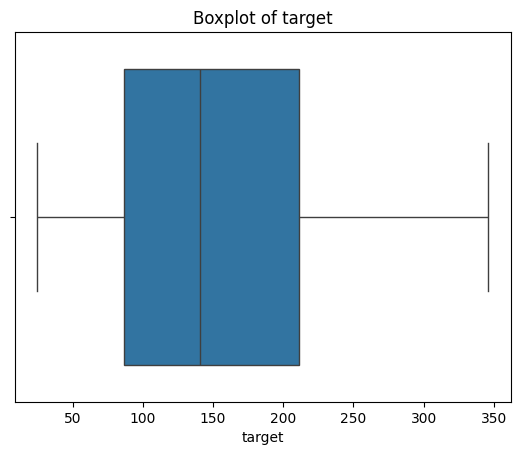

In [14]:
# Check for null values
print("Null Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Visualizing the distribution of features
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for all features
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load diabetes dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest R^2 Score: {r2_rf:.2f}")


Random Forest Mean Squared Error: 2952.01
Random Forest R^2 Score: 0.44


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load diabetes dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on training data
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred)

print(f"Gradient Boosting Mean Squared Error: {mse_gb:.2f}")
print(f"Gradient Boosting R^2 Score: {r2_gb:.2f}")


Gradient Boosting Mean Squared Error: 2898.44
Gradient Boosting R^2 Score: 0.45


In [20]:
# Check the first few rows of the 'bmi' column to understand its structure
print(df['bmi'].head())

# Ensure that 'bmi' is a pandas Series and apply log transformation
if isinstance(df['bmi'], pd.Series):
    df['log_bmi'] = np.log(df['bmi'])
else:
    print("Error: 'bmi' is not a valid Series.")


        bmi       bmi
0  0.061696  0.061696
1 -0.051474 -0.051474
2  0.044451  0.044451
3 -0.011595 -0.011595
4 -0.036385 -0.036385
Error: 'bmi' is not a valid Series.


In [21]:
# Check the columns in the dataframe
print(df.columns)

# If there are duplicate columns, remove the duplicates
df = df.loc[:, ~df.columns.duplicated()]

# Now try the log transformation on the 'bmi' column again
df['log_bmi'] = np.log(df['bmi'])


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target',
       'bmi_age_interaction', 'bmi', 'bp', 'bmi^2', 'bmi bp', 'bp^2'],
      dtype='object')


c:\Users\RickE\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\RickE\AppData\Local\Temp\ipykernel_18056\1604743738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_bmi'] = np.log(df['bmi'])


In [22]:
# Log transformation of the 'bmi' column
df['log_bmi'] = np.log(df['bmi'])

# Bin the 'age' column
df['binned_age'] = pd.cut(df['age'], bins=5, labels=False)

# Apply MinMaxScaler to specific columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']] = scaler.fit_transform(df[['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']])


c:\Users\RickE\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\RickE\AppData\Local\Temp\ipykernel_18056\2064509480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_bmi'] = np.log(df['bmi'])


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = df.drop(columns=['target'])  # Replace 'target' with your actual target column name
y = df['target']  # Target column

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2980.076816853933
R^2 Score: 0.43752520533442485


In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features and target
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Mean Squared Error: {mse}")
print(f"XGBoost R² Score: {r2}")


XGBoost Mean Squared Error: 3383.657231884109
XGBoost R² Score: 0.3613513933738346
